In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv("/Users/harish/Desktop/GitHub/Analysis_of_Musk_Tweets/data_elonmusk.csv",encoding='latin1')

In [3]:
tweets.head()

,row ID,Tweet,Time,Retweet from,User
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk


In [4]:
tweets = tweets.assign(Time=pd.to_datetime(tweets.Time)).drop('row ID', axis='columns')

In [5]:
tweets.head()

,Tweet,Time,Retweet from,User
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk


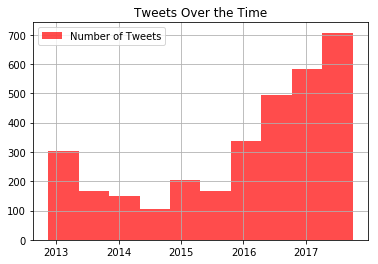

In [6]:
#tweet activity over the years
import matplotlib.pyplot as plt
tweets['Time'].hist(label='Number of Tweets',alpha=0.7,color='red')
plt.legend()
plt.title("Tweets Over the Time")
plt.show()

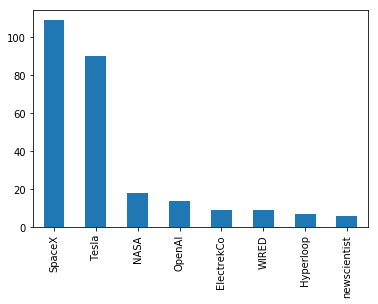

In [7]:
#Let's check his retweets

tweets['Retweet from'].value_counts(dropna=True)[:8].plot(kind='bar')
plt.show()

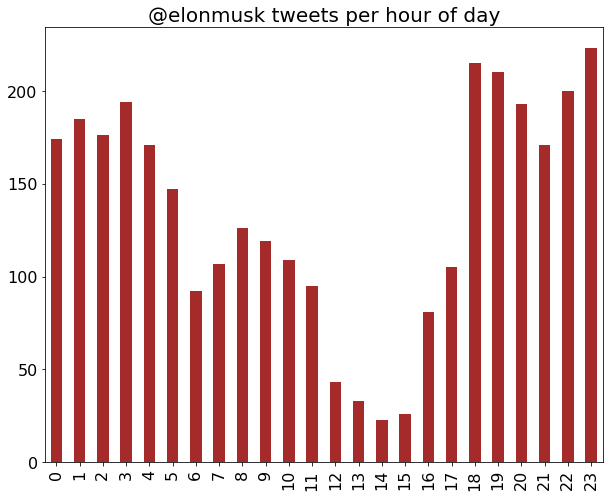

In [8]:
(tweets.Time
     .dt
     .hour
     .value_counts()
     .sort_index()
).plot.bar(figsize=(10, 8), fontsize=16, color='Brown')
plt.gca().set_title('@elonmusk tweets per hour of day', fontsize=20)
plt.show()
y=tweets['Tweet']

#LOOKS LIKE HE IS VERY ACTIVE AROUND MID-NIGHT

In [9]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
tokens = [word_tokenize(tweet.lower()) for tweet in y]

In [10]:
from nltk.corpus import stopwords
no_stops = [t for t in tokens if not t in stopwords.words('english')]

In [11]:
print "Number of tweets in the data set: " + str(len(tokens))

Number of tweets in the data set: 3218


In [12]:
from gensim.corpora.dictionary import Dictionary
from collections import Counter

In [13]:
token_words = tweets.Tweet.map(word_tokenize)

In [14]:
dictionary = Dictionary(token_words)

In [15]:
tokens = tweets.Tweet.map(word_tokenize)

def musk_thoughts_on(x):
    x_l = x.lower()
    x_t = x.title()
    return tweets.loc[tokens.map(lambda sent: x_l in sent or x_t in sent).values]

In [16]:
#Let's see Elon thoughts on specific topics or people
musk_thoughts_on('lithium').values.tolist()

[[u'@ScottLucasNV Lithium deal is not exclusive & has many contingencies. The press on this matter is unwarranted.',
  Timestamp('2015-09-02 23:39:18'),
  nan,
  u'elonmusk'],
 [u'Maybe already under control, but Tesla & SpaceX are happy to help with the 787 lithium ion batteries.',
  Timestamp('2013-01-18 19:24:36'),
  nan,
  u'elonmusk']]

In [17]:
musk_thoughts_on('oil').values.tolist()

[[u'Worth noting that all gasoline cars are heavily subsidized via oil company tax credits & unpaid public health costs https://t.co/4li5E013Dj',
  Timestamp('2016-02-19 10:37:53'),
  nan,
  u'elonmusk'],
 [u'CH4 rapidly decays back to CO2 & is absorbed by plants. What matters is adding new carbon to surface cycle from underground oil, gas & coal.',
  Timestamp('2015-10-11 03:31:20'),
  nan,
  u'elonmusk'],
 [u'RT @LeilaniMunter: Dear Oil, I am breaking up with you... http://t.co/D0cxsW6yt1 --- @TeslaMotors @elonmusk @TeslaMotorsClub',
  Timestamp('2013-07-15 16:02:26'),
  u'LeilaniMunter',
  u'elonmusk'],
 [u'And, since we will run out of oil anyway, why risk the future of all life on Earth simply to delay sustainable energy?',
  Timestamp('2013-05-24 07:46:25'),
  nan,
  u'elonmusk']]

In [18]:
musk_thoughts_on('Trump').values.tolist()

[[u"@W4AS Good grief, I'm not working for Trump. I'm trying to provide advice that helps take things in a more positive direction.",
  Timestamp('2017-02-05 19:16:23'),
  nan,
  u'elonmusk'],
 [u'RT @Gizmodo: A brief chat with Elon Musk about climate change, Rex Tillerson, and Donald Trump https://t.co/IJo34UeDSq https://t.co/xrYj3Dq?',
  Timestamp('2017-01-26 03:06:06'),
  u'Gizmodo',
  u'elonmusk'],
 [u'RT @ElectrekCo: Right-wing group led by Trump propagandist launches campaign against Elon Musk, Tesla and SpaceX https://t.co/re8hDmjonX ht?',
  Timestamp('2016-11-22 17:39:01'),
  u'ElectrekCo',
  u'elonmusk'],
 [u'RT @ggreenwald: Trump Picks Top Climate Skeptic to Lead EPA Transition https://t.co/fTiN4KuKJq',
  Timestamp('2016-11-10 02:22:18'),
  u'ggreenwald',
  u'elonmusk'],
 [u"The AEI meeting wasn't secret and I was only there for a few hours to talk about Mars and sustainable energy. Nothing to do with Trump.",
  Timestamp('2016-03-09 20:20:50'),
  nan,
  u'elonmusk']]

In [19]:
# '@' is just like tagging a person. Looks like more than 60% are response tweets.
tweets.Tweet.str.contains('@').value_counts() / len(tweets)

True     0.643567
False    0.356433
Name: Tweet, dtype: float64

In [20]:
import re, string
from nltk.stem import PorterStemmer
clean = [i.replace('+', ' ').replace('.', ' ').replace(',', ' ').replace(':', ' ').replace('(',' ').replace(')',' ').replace('\n',' ').replace('http',' ') for i in y]
clean = re.sub("(^|\W)\d+($|\W)", " ", str(clean)).lower()
clean = re.sub(r'https?:\/\/.*\/\w*',' ',clean) # Remove hyperlinks
clean = re.sub(r'['+string.punctuation+']+', ' ',clean) # Remove puncutations


stop_words = set(stopwords.words('english'))
tweet_text=[]
for w in clean.split():
    if w not in stop_words and len(w) > 2:
        ps = PorterStemmer()
        tweet_text.append(ps.stem(w)) # stemming words
#print(tweet_text)


In [21]:
tweets_counter = Counter(tweet_text)

In [22]:
tweets_counter.most_common(15)

[('tesla', 386),
 ('spacex', 267),
 ('model', 243),
 ('car', 195),
 ('launch', 185),
 (u'teslamotor', 183),
 ('good', 152),
 ('like', 149),
 ('rocket', 140),
 (u'land', 136),
 ('falcon', 124),
 (u'ye', 123),
 ('first', 111),
 ('next', 103),
 ('need', 101)]